In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

In [2]:
tablefile_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/O3/TransientTable/"
tablefile_name = "TransientTable.csv"
save_dir = "./pics/o3/"
tablefiles = [os.path.join(tablefile_dir, event_dir, tablefile_name) for event_dir in os.listdir(tablefile_dir) if os.path.exists(os.path.join(tablefile_dir, event_dir, tablefile_name) )]

tablefiles = [os.path.join(tablefile_dir, file) for file in os.listdir(tablefile_dir) if "TransientTable" in file]
#print("\n".join(tablefiles))

In [3]:
all_data = pd.DataFrame()

for file in tablefiles:
    #print(file)
    df_tmp = pd.read_csv(file, sep=";")
    #print(rate_tmp)
    all_data = pd.concat([all_data, df_tmp])

#all_data["map_name"]
print(len(all_data))
all_data["kilonovaness"] = all_data["kilonovaness"].astype(int)
all_data_sorted = all_data.copy().sort_values(by="kilonovaness", ascending=False)
all_data_sorted["kilonovaness"]

760


0      16
1      16
0      16
0      16
1      16
       ..
174     1
175     1
176     1
177     1
16      1
Name: kilonovaness, Length: 760, dtype: int64

In [4]:
kilonovaness_range = np.arange(1, 25)

rate_df = pd.DataFrame()

for file in tablefiles:
    #print(file)
    if "~lock" in file:
        continue
    df_tmp = pd.read_csv(file, sep=";")
    try:
        # count kilonovaness = n occurences in tablefile, then divide by total map_area/1000sqdeg 
        df_tmp["kn-1000-rate"] = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"]]) / df_tmp["map_area"] * 1000
        df_tmp["kn-counts"] = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"]])
    except:
        print(df_tmp, file)


    #rate_tmp = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"].unique()]) / df_tmp["map_area"][0] * 1000
    rate_tmp = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in kilonovaness_range]) / df_tmp["map_area"][0] * 1000

    #count_tmp = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"].unique()])
    count_tmp = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in kilonovaness_range])

    #tmp_rate_df = pd.DataFrame({"kilonovaness": df_tmp["kilonovaness"].unique(),"kn-1000-rate": rate_tmp, "seed": df_tmp["map_seed"][0], "Map dist": df_tmp["map_dist"][0], "kn-count": count_tmp})
    tmp_rate_df = pd.DataFrame({"kilonovaness": kilonovaness_range,"kn-1000-rate": rate_tmp, "seed": df_tmp["map_seed"][0], "Map dist": df_tmp["map_dist"][0], "kn-count": count_tmp})

    #print(rate_tmp)
    rate_df = pd.concat([rate_df, tmp_rate_df])


rate_df.sort_values(by="kn-count", ascending=False).head(14)


,kilonovaness,kn-1000-rate,seed,Map dist,kn-count
2,3,4.746925,S190910h_0,241.450383,115
0,1,3.013996,S190930t_0,108.485191,73
2,3,1.899230,S190930t_0,108.485191,46
0,1,18.152655,S191109d_0,1810.148665,27
0,1,36.631187,S191110x_0,203.976886,27
4,5,0.908107,S190910h_0,241.450383,22
4,5,0.867040,S190930t_0,108.485191,21
0,1,7.007407,S190930s_0,752.372125,14
5,6,0.578027,S190930t_0,108.485191,14
2,3,6.506878,S190930s_0,752.372125,13


/tmp/ipykernel_20716/3925381868.py:85: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


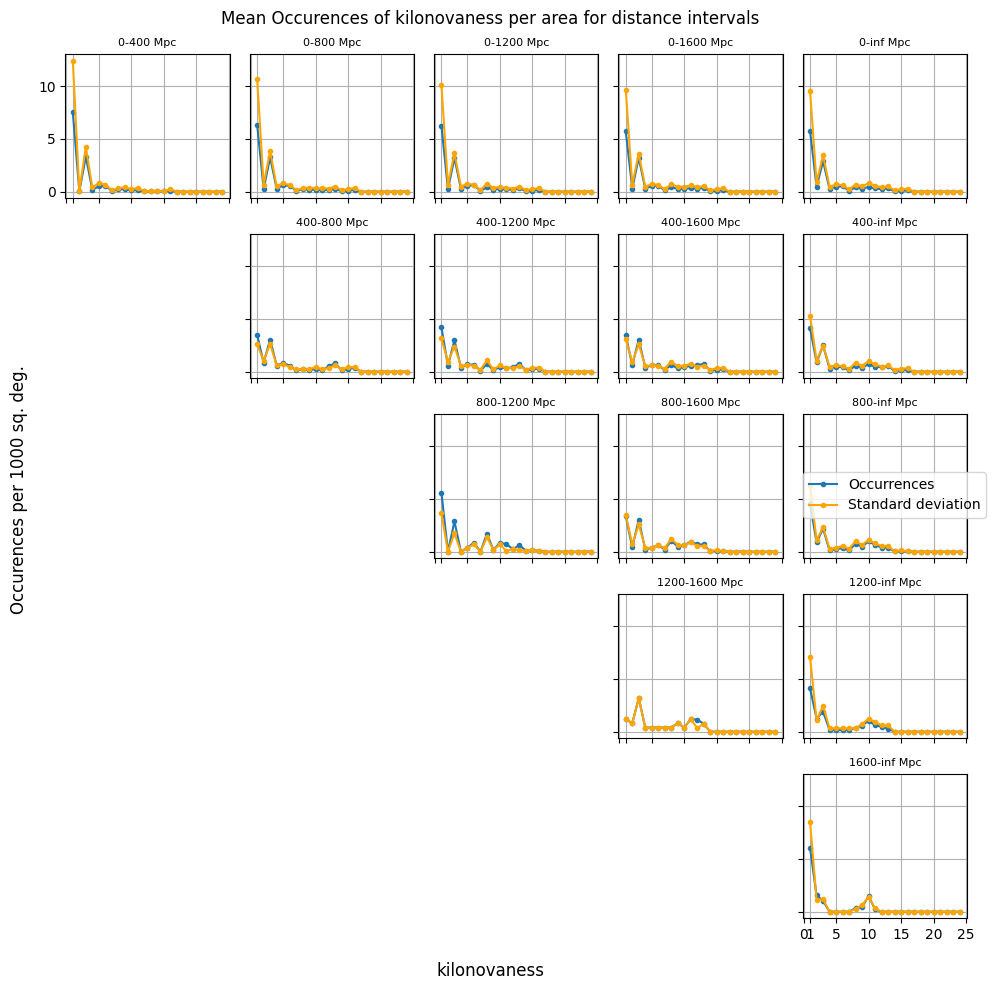

In [5]:
distance_mins = [0, 400, 800, 1200, 1600]
distance_maxs = [400, 800, 1200, 1600, np.inf]
n = len(distance_mins)
m = len(distance_maxs)

binned_data = np.empty((n, m), dtype=pd.DataFrame)

#print(binned_data)

for k in range(n):
    for j in range(k, m):

        dist_min = distance_mins[k]
        dist_max = distance_maxs[j]
        #print(f"From {dist_min} to {dist_max} Mpc")


        kilonovaness_rate = pd.DataFrame(columns=["kilonovaness", "rate-1000", "std-1000", "entries"])
        #print(kilonovaness_rate.head())
        #print(data["kilonovaness"].unique())

        
        lim_data = rate_df.copy()[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]

        #print(dist_min, dist_max, len(lim_data))
        for kilonovaness in lim_data["kilonovaness"].unique():
            #print(kilonovaness)
            tmp = lim_data.copy()[lim_data["kilonovaness"] == kilonovaness]

            #print(tmp)

            data_dict = {"kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)], "kn-count": [sum(tmp["kn-count"])]}
            #print(data_dict)
            mini_tmp = pd.DataFrame.from_dict(data_dict)

            kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
            kilonovaness_rate = kilonovaness_rate.sort_values(by=["kilonovaness"], ascending=True)
        
        #print("kilonovaness rate", kilonovaness_rate)
        binned_data[k, j] = kilonovaness_rate
        
        # print(kilonovaness_rate)

#print(kilonovaness_rate.head(5))

#print(binned_data)

fig, axs = plt.subplots(ncols=m, nrows=n, figsize=(10, 10),
                        layout="constrained", sharex=True, sharey=True, subplot_kw={"xticks": [0, 1, 5, 10, 15, 20, 25], "yticks": [0, 5, 10, 15, 20,25, 30, 35, 40, 45]})
# fill plots
for row in range(n):
    ind_1 = row
    for col in range(m):

        ind_2 = col
        if (binned_data[row, col] is not None):
            #print(), 20, 25
            axs[ind_1, ind_2].plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["rate-1000"], marker=".", label="Occurrences")
            #secax_x2 = axs[-row-1, -col-1].twinx()
            axs[ind_1, ind_2].plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange", label="Standard deviation")
            #secax_x2.plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange")
            axs[ind_1, ind_2].set_title(f"{distance_mins[row]}-{distance_maxs[col]} Mpc", fontsize=8)
            axs[ind_1, ind_2].grid()
        else:
            axs[ind_1, ind_2].set_visible(False)
        #pass

handles, labels = axs[row, col].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

fig.suptitle('Mean Occurences of kilonovaness per area for distance intervals')
fig.supxlabel("kilonovaness")
fig.supylabel("Occurences per 1000 sq. deg.", ha="left")

# dummy axes 2 for right ylabel
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xticks([])
# ax.set_yticks([])
# [ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
# ax.patch.set_visible(False)
# ax.yaxis.set_label_position('right')
# ax.set_ylabel('Standard deviation', labelpad=30, fontsize=12)


fig.tight_layout()
plt.show()


In [10]:
distance_mins = [0, 0, 400, 800, 1200, 1600]
distance_maxs = [np.inf, 400, 800, 1200, 1600, np.inf]
n = len(distance_mins)
m = len(distance_maxs)

binned_data = np.empty(m, dtype=pd.DataFrame)

gw170817_dict = {f"AT2017gfo <br> at 0 days" : 18, f"AT2017gfo <br> at 3 days": 21}
anno_pos = {f"AT2017gfo <br> at 0 days" : "top left", f"AT2017gfo <br> at 3 days": "bottom right"}

#print(binned_data)

for k in range(m):


    dist_min = distance_mins[k]
    dist_max = distance_maxs[k]
    #print(f"From {dist_min} to {dist_max} Mpc")


    kilonovaness_rate = pd.DataFrame(columns=["kilonovaness", "rate-1000", "std-1000", "entries"])
    #print(kilonovaness_rate.head())
    #print(data["kilonovaness"].unique())

    
    lim_data = rate_df.copy()[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]
    #print(sum(lim_data["kn-count"]))

    #print(dist_min, dist_max, len(lim_data))
    for kilonovaness in lim_data["kilonovaness"].unique():
        #print(kilonovaness)
        tmp = lim_data.copy()[lim_data["kilonovaness"] == kilonovaness]

        #print(tmp)

        data_dict = {"kilonovaness": [float(kilonovaness)], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)], "kn-count": [sum(tmp["kn-count"])]}
        #print(data_dict)
        mini_tmp = pd.DataFrame.from_dict(data_dict)

        kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
        kilonovaness_rate = kilonovaness_rate.sort_values(by=["kilonovaness"], ascending=True)
    
    #print("kilonovaness rate", kilonovaness_rate)
    binned_data[k] = kilonovaness_rate
        
        # print(kilonovaness_rate)

#print(kilonovaness_rate.head(5))

#print(binned_data)


# fill plots
for col in range(m):
    #fig, ax = plt.subplots(figsize=(5,5))
    fig = go.Figure()
    if (binned_data[col] is not None):
        #print(), 20, 25

        binned_data[col]["minus"] = np.clip(binned_data[col]["rate-1000"]-binned_data[col]["std-1000"], 0, np.inf)
        binned_data[col]["plus"] = binned_data[col]["rate-1000"]+binned_data[col]["std-1000"]

        fig.add_trace(go.Scatter(
                                name='Upper Bound',
                                x=binned_data[col]["kilonovaness"],
                                y=binned_data[col]["plus"],
                                mode='lines',
                                marker=dict(color="#444"),
                                line=dict(width=0),
                                showlegend=False
                            ))
        fig.add_trace(go.Scatter(
                                name='Lower Bound',
                                x=binned_data[col]["kilonovaness"],
                                y=binned_data[col]["minus"],
                                #marker=dict(color="#444"),
                                line=dict(width=0),
                                mode='lines',
                                #fillcolor='red',
                                opacity=0.1,
                                fill='tonexty',
                                showlegend=False
                            ))
        
        fig.add_trace(go.Scatter(x=binned_data[col]["kilonovaness"], y=binned_data[col]["rate-1000"], name="Occurrences", line={"color": "blue"}))

    for day, kilo in gw170817_dict.items():
        fig.add_vline(x=kilo, line_width=1, line_dash="dash", annotation_text=day, annotation_position=anno_pos[day])

    fig.update_layout(width=500, 
                      height=500,
                      title=f"{distance_mins[col]}-{distance_maxs[col]} Mpc, entries in bin = {int(sum(binned_data[col]['kn-count']))}",
                      hovermode="x",
                      xaxis_range=(0, 22),
                      yaxis_title="Mean occurrences per 1000 sq. deg.")
    #fig.tight_layout()
    fig.show()

    filename = os.path.join(save_dir, f"kilonovaness_binned_{distance_mins[col]}_{distance_maxs[col]}.pdf")
    fig.write_image(filename)

In [7]:
hist = np.histogram(all_data["kilonovaness"], bins=np.max(all_data["kilonovaness"]))

fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(1, np.max(all_data["kilonovaness"])+1), y=hist[0]/len(all_data["kilonovaness"])))
fig.show()
print(len(all_data))

760


In [8]:
hist = np.histogram(all_data["map_dist"])

fig = go.Figure()

fig.add_trace(go.Histogram(x=all_data["map_dist"], histnorm='probability'))
fig.show()
print(len(all_data))

760


In [11]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=all_data["map_area"], histnorm='probability', nbinsx=15))
fig.update_layout({"width": 600,
                   "title": "GW map area in O3 maps",
                   "xaxis_title": "Area (squ. deg.)",
                   "yaxis_title": "Counts (relative)"})
fig.show()
figname = os.path.join(save_dir, "map_area.pdf")
fig.write_image(figname)
print(len(all_data))

760


In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=all_data["map_dist"], y=all_data["map_dist_unc"], mode="markers"))
fig.update_layout({"width": 600,
                   "title": "GW map dist in O3 maps",
                   "xaxis_title": "Dist (Mpc)",
                   "yaxis_title": "Dist. unc. (Mpc)"})
fig.show()

print(len(all_data))

760
